# Laboratorium 7

## Automaty komórkowe - modelowanie epidemii

Proszę zaimplementować model epidemii jako automat komórkowy https://mathworld.wolfram.com/CellularAutomaton.html 
Przykładowe modele to np. SIR lub SIS https://en.wikipedia.org/wiki/Epidemic_models_on_lattices  
Program powinien generować:
- wizualizację modelu (animacja, film itp)
- wykresy zmian populacji z czasie

Proszę zbadać działanie modelu dla różnych parametrów.
Program i wyniki proszę zaprezentować w postaci notatnika Jupyter i wgrać 2 pliki w formatach:
- ipynb
- html

Dodatkowe linki:
- Gra w życie https://mathworld.wolfram.com/GameofLife.html 
- John Conway https://blogs.scientificamerican.com/observations/remembering-mathematical-magician-john-conway/ 
- Stephen Wolfram - "Teoria wszystkiego" https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/ 
- Stephen Wofram - A New Kind of Science https://www.wolframscience.com/nks/ 
- Przykład i porównanie implementacji automatu komórkowego w Julii i w Pythonie https://grimmel.github.io/posts/2020/10/blog-post-1/ 

## SIR epidemic model

Model ten dzieli rozpatrywaną populację na trzy stany:
- S (*susceptible*) - osoby, które jeszcze nie zostały zainfekowane, nie mają odporności, są więc podatne na zarażenie
- I (*infected*) - osoby obecnie zainfekowane ("chore") oraz zaraźliwe dla sąsiadów w stanie S
- R (*removed*) - niebrane pod uwagę w dalszym procesie z powodu uzyskania stałej odporności lub z powodu śmierci

Liczba osób w danym stanie opisywana jest w funkcji czasu, odpowiednio *I*, *S* albo *R*. Jednocześnie w danym czasie *t* suma wartości tych trzech funkcji w tym punkcie czasu wynosi *N* (liczebność rozpatrywanej populacji). Model SIR bazuje na następujących równaniach różniczkowych, opisujących tempo przyrostu liczebności poszczególnych grup:

<img src="../Desktop/SIR_equations.png" />

gdzie:
- $\beta$ - współczynnik przenoszenia choroby: opisuje prawodpodobieństwo transmisji choroby z osoby z grupy *I* na osobę z grupy *R*
- $\gamma$ - współczynnik powrotu do zdrowia: opisuje tempo przejścia osób z grupy *I* do grupy *R*. Jest odwrotnie proporcjonalny do czasu potrzebnego do wyzdrowienia z choroby, wyrażonego w dniach, *n*

#### Współczynnik reprodukcji ####
Stanowi ważny parametr opisu dynamiki epidemii. Określa on średnią liczbę osób zakażonych przez jedną zainfekowaną osobę.
$$R_{0}=\frac{\beta}{\gamma}$$

Osoby, które przebyły chorobę COVID-19, wykształcają odporność trwającą przez co najmniej 5-7 miesięcy. Stanowi to na tyle długi okres czasu, że tzw. "ozdrowieńców" zakwalifikować można do grupy R, co umożliwia zastosowanie modelu SIR w badaniu przebiegu epidemii SARS-COV-2.

### Wykresy zmian liczby osób w poszczególnych stanach

In [14]:
# using DifferentialEquations
# using Plotly
# using Plots
# plotly()
# Plots.PlotlyBackend()
# using PlotlyBase
# using PyPlot

- **Obliczanie pochodnych w punktach czasu**

In [40]:
function parameterized_derivative!(du, u, p, t)
    S, I, R = u
    beta, gamma, N = p
    du[1] = -beta * S * I / N
    du[2] = beta * S * I / N - gamma * I
    du[3] = gamma * I
end

parameterized_derivative! (generic function with 1 method)

- **Rozwiązywanie układu równań różniczkowych dla danych parametrów modelu SIR**

In [41]:
function SIR_computations(parameters, variables, days)
    beta = parameters[1]
    gamma = parameters[2]
    N = parameters[3]
    
    I0 = variables[1]
    R0 = variables[2]
    S0 = variables[3]
    
    # Define differential equation problem
    u0 = [S0; I0; R0]
    tspan = (0.0, days)
    params = [ beta, gamma, N]
    prob = ODEProblem(parameterized_derivative!, u0, tspan, params);

    # Solve system of differential equations
    sol = solve(prob);
    return sol
end

SIR_computations (generic function with 1 method)

#### Wykres dla $\beta$ = 0.15, $\gamma$ = 1/21

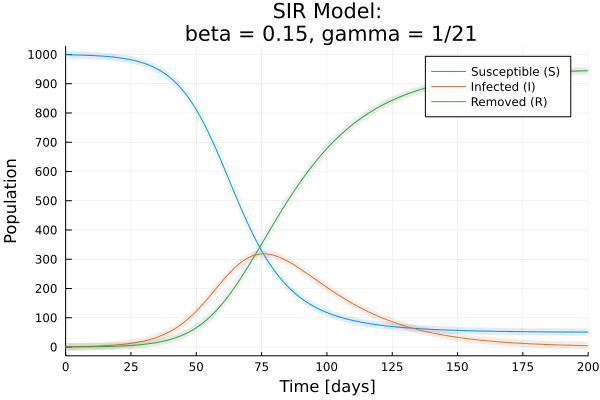

In [54]:
# Define model parameters
N = 1000.0
beta = 0.15
gamma = 1.0/21.0

# Define population
I0 = 1;
R0 = 0;
S0 = N - I0 - R0;

parameters = (beta, gamma, N)
variables = (I0, R0, S0)
days = 200.0

# Perform computations
result = SIR_computations(parameters, variables, days);

# Plot results
plot1 = Plots.plot(result, vars=[(0,1), (0,2), (0,3)], title="SIR Model:\n beta = 0.15, gamma = 1/21", 
    xaxis="Time [days]", yaxis="Population", marker=0.01, label=["Susceptible (S)" "Infected (I)" "Removed (R)"],
    xticks = 0:25:200, yticks = 0:100:1000)

#### Wykres dla $\beta$ = 0.15, $\gamma$ = 1/14

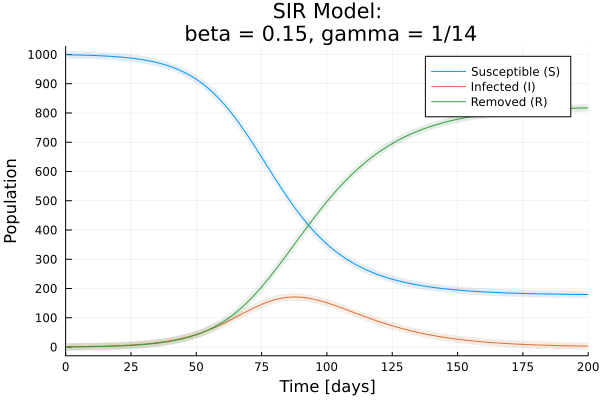

In [57]:
# Define model parameters
N = 1000.0
beta = 0.15
gamma = 1.0/14.0

# Define population
I0 = 1;
R0 = 0;
S0 = N - I0 - R0;

parameters = (beta, gamma, N)
variables = (I0, R0, S0)
days = 200.0

# Perform computations
result = SIR_computations(parameters, variables, days);

# Plot results
plot2 = Plots.plot(result, vars=[(0,1), (0,2), (0,3)], title="SIR Model:\n beta = 0.15, gamma = 1/14", 
    xaxis="Time [days]", yaxis="Population", marker=0.01, label=["Susceptible (S)" "Infected (I)" "Removed (R)"],
    xticks = 0:25:200, yticks = 0:100:1000)

### Porównanie wykresów dla różnego czasu zdrowienia *n = 1/$\gamma$*

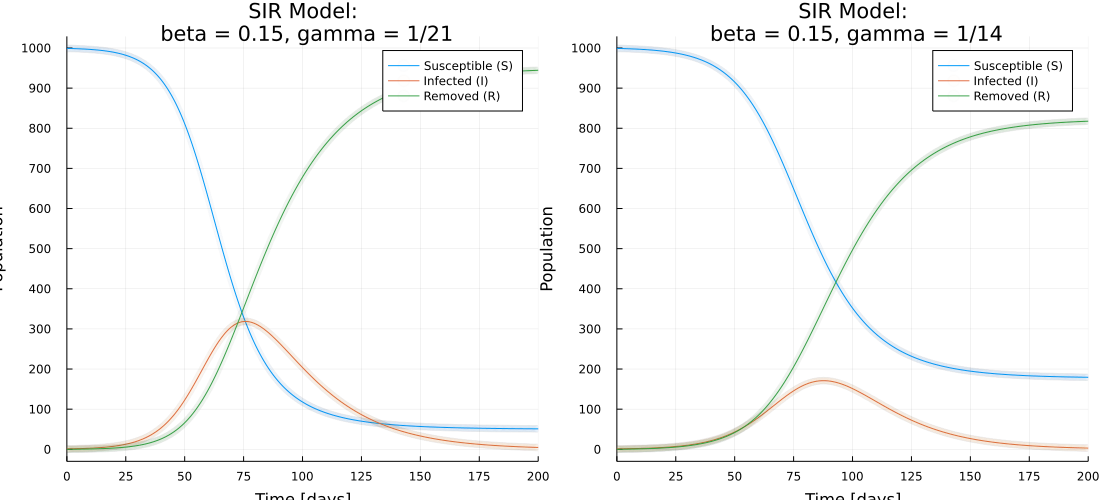

In [59]:
Plots.plot(plot1, plot2, layout=(1,2), size=(1100,500))

Zestawienie powyższych wykresów ilustruje zależność dynamiki przebiegu epidemii od czasu zdrowienia. Przyglądając się punktowi tzw. odporności zbiorowej, przyjmowanej jako R=70%, widać, że jest jest ona osiągana szybiej, gdy czas zdrowienia jest dłuższy (21 dni w porównaniu do 14 dni). Dzieje się tak ponieważ osobniki zakażone mają szansę zarażać dłużej, zanim wyzdrowieją, zatem fala zakażeń ma bardziej dynamiczny przebieg, większa liczba osób szybciej przechoruje, w konsekwencji czego odporność zbiorowa zostanie uzyskana szybciej.

## Doświadczenia z użyciem automatów komórkowych - modelowanie epidemii

### Parametry automatu komórkowego, symulującego przebieg epidemii: ###
- $\alpha$ - część populacji, która przemieści się w sposób losowy
- $\beta$ - współczynnik przenoszenia choroby: opisuje prawodpodobieństwo zarażenia komórki sąsiadującej z komórką zakażoną
- $\gamma$ - prawdopodobieństwo, że zainfekowana jednostka wyzdrowieje lub umrze
- $\frac{1}{\gamma}$ - okres zaraźliwości
- *$x_{max}$*, *$y_{max}$* - rozmiary automatu komórkowego
- *I* - całkowita liczba komórek: *I=$x_{max}$*$y_{max}$
- *$I_{0}$* - wyjściowa liczba komórek zakażonych

Dla celów doświadczenia przyjmuję czas trwania choroby równy 21 dni:<br>
<center>$\frac{1}{\gamma} = 21$, $\gamma$=$\frac{1}{21}$</center>

In [147]:
function initialize(I_0, dims)
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2
    
    x_max = dims[1]
    y_max = dims[2]
    
    arr = zeros(Int64, (x_max,y_max))
    infected = 0
    
    while infected != I_0
        rx = rand(1:x_max)
        ry = rand(1:y_max)
        if arr[rx,ry] == SUSCEPTIBLE
            arr[rx,ry] = INFECTED
            infected += 1
        end
    end
    return arr
end

initialize (generic function with 2 methods)

In [17]:
function pick_random_neighbour(x, y, x_max, y_max)
    x_dirs = [0, 1, 1, 1, 0, -1, -1, -1]
    y_dirs = [1, 1, 0, -1, -1, -1, 0, 1]
    
    while true
        dir = rand(1:8)
        dx = x_dirs[dir]
        dy = y_dirs[dir]
        new_x = x + dx
        new_y = y + dy
        if new_x <= x_max && new_x >= 1 && new_y <= y_max && new_y >= 1
            return (new_x, new_y)
        end
    end
end        

pick_random_neighbour (generic function with 1 method)

In [171]:
function make_movements(arr, count, x_max, y_max)
    if count > 0
        for i in 1:count
            x1 = rand(1:x_max)
            y1 = rand(1:y_max)
            x2 = rand(1:x_max)
            y2 = rand(1:y_max)
            arr[x1, y1], arr[x2, y2] = arr[x2, y2], arr[x1, y1]
        end
    end
    return arr
end

make_movements (generic function with 1 method)

In [172]:
function ca_step(arr, dims, epidemic_params, movements, i)
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2
    
    x_max = dims[1]
    y_max = dims[2]
    
    alpha = epidemic_params[1]
    beta = epidemic_params[2]
    gamma = epidemic_params[3]
    
    print(string(i, " "))
    arr = make_movements(arr, movements, x_max, y_max)
    new_arr = arr
    
    for x in 1:x_max
        for y in 1:y_max
            if arr[x, y] == INFECTED
                # Recovery rate
                if rand(0:0.0001:1) < gamma
                    arr[x, y] = REMOVED
                # Infection rate
                elseif rand(0:0.0001:1) < beta
                    new_x, new_y = pick_random_neighbour(x, y, x_max, y_max)
                    if arr[new_x, new_y] == SUSCEPTIBLE
                        new_arr[new_x, new_y] = INFECTED
                    end
                end
            end
        end
    end
    return new_arr
end

ca_step (generic function with 1 method)

In [150]:
function generate_stats(arr, stats_pack, dims)
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2
    
    S = I = R = 0
    
    x_max = dims[1]
    y_max = dims[2]
    
    S_stats = stats_pack[1]
    I_stats = stats_pack[2]
    R_stats = stats_pack[3]
    
    for x in 1:x_max
        for y in 1:y_max
            unit = arr[x, y]
            if unit == SUSCEPTIBLE
                S += 1
            elseif unit == INFECTED
                I += 1
            else
                R += 1
            end
        end
    end
    push!(S_stats, S)
    push!(I_stats, I)
    push!(R_stats, R)
end                

generate_stats (generic function with 1 method)

### Case 1:
- $\alpha$ = 0.01
- $\beta$ = 0.3
- $\gamma$ = 1/21

#### Populacja 100 jednostek

In [184]:
# SUSCEPTIBLE = 0
# INFECTED = 1
# REMOVED = 2

x_max = 10
y_max = 10

alpha = 0.01
beta = 0.15
gamma = 1.0/21
I_0 = 1

S_stats = Array{Int}(undef, 0)
I_stats = Array{Int}(undef, 0)
R_stats = Array{Int}(undef, 0)

N = x_max * y_max
movements = Int64(N * alpha)

epidemic_params = (alpha, beta, gamma, I_0)
dims = (x_max, y_max)
stats_pack = (S_stats, I_stats, R_stats)

days = 200

ca_arr = initialize(I_0, dims);

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

┌ Info: Saved animation to 
│   fn = C:\Users\basia\Desktop\anim_fps10.gif
└ @ Plots C:\Users\basia\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\basia\\Desktop\\anim_fps10.gif")
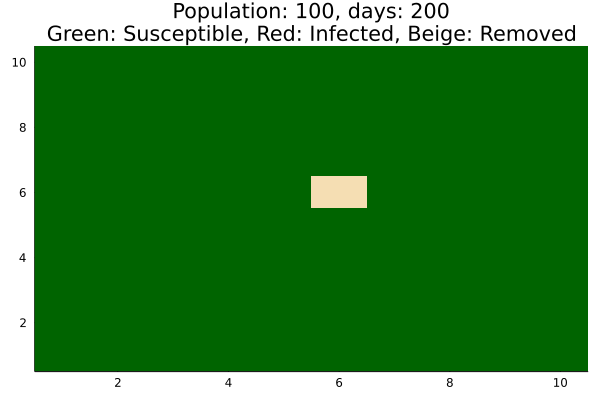

In [185]:
using Plots

anim = @animate for i in 1:days
    plot(heatmap(ca_arr, c=cgrad([:darkgreen, :maroon, :wheat]), title=string("Population: ", N, ", days: ", days, "\nGreen: Susceptible, Red: Infected, Beige: Removed"), legend=false))
    #Plots.frame(anim)
    generate_stats(ca_arr, stats_pack, dims)
    ca_arr = ca_step(ca_arr, dims, epidemic_params, movements, i)
end

gif(anim, "anim_fps10.gif", fps=5)

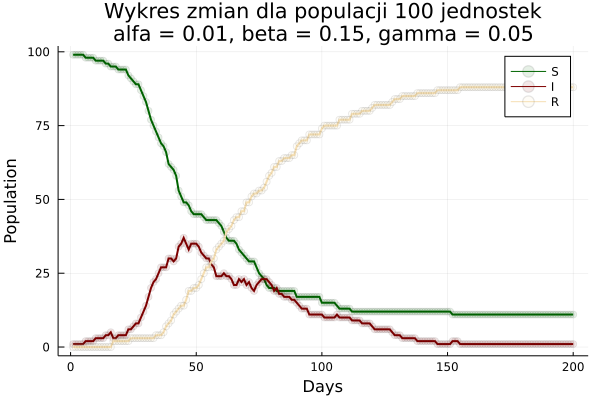

In [186]:
plot(S_stats, label="S", colour="darkgreen", lw=2, marker=0.1, xaxis="Days", yaxis="Population", title=string("Wykres zmian dla populacji ", N," jednostek\nalfa = ", alpha, ", beta = ", beta, ", gamma = ", round(gamma, digits=2)))
plot!(I_stats, label="I", colour="maroon", lw=2, marker=0.1)
plot!(R_stats, label="R", colour="wheat", lw=2, marker=0.1)

#### Populacja 10 000 jednostek

In [187]:
# SUSCEPTIBLE = 0
# INFECTED = 1
# REMOVED = 2

x_max = 100
y_max = 100

alpha = 0.01
beta = 0.15
gamma = 1.0/21
I_0 = 1

S_stats = Array{Int}(undef, 0)
I_stats = Array{Int}(undef, 0)
R_stats = Array{Int}(undef, 0)

N = x_max * y_max
movements = Int64(N * alpha)

epidemic_params = (alpha, beta, gamma, I_0)
dims = (x_max, y_max)
stats_pack = (S_stats, I_stats, R_stats)

days = 200

ca_arr = initialize(I_0, dims);

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

┌ Info: Saved animation to 
│   fn = C:\Users\basia\Desktop\anim_fps10.gif
└ @ Plots C:\Users\basia\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\basia\\Desktop\\anim_fps10.gif")
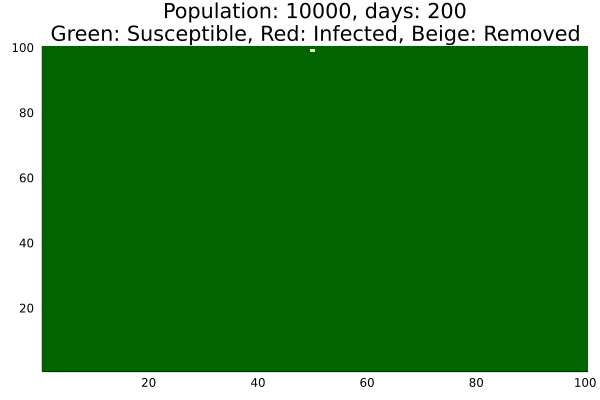

In [188]:
using Plots

anim = @animate for i in 1:days
    plot(heatmap(ca_arr, c=cgrad([:darkgreen, :maroon, :wheat]), title=string("Population: ", N, ", days: ", days, "\nGreen: Susceptible, Red: Infected, Beige: Removed"), legend=false))
    #Plots.frame(anim)
    generate_stats(ca_arr, stats_pack, dims)
    ca_arr = ca_step(ca_arr, dims, epidemic_params, movements, i)
end

gif(anim, "anim_fps10.gif", fps=15)

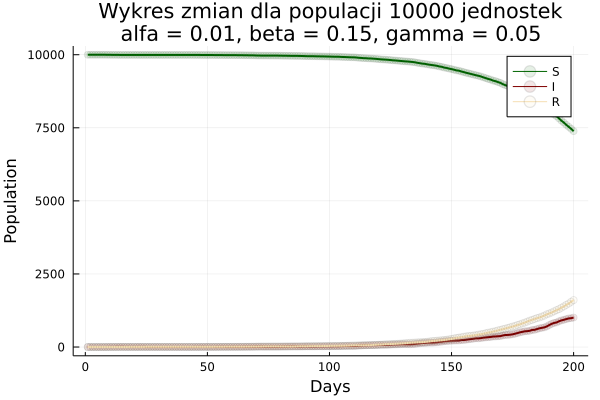

In [189]:
plot(S_stats, label="S", colour="darkgreen", lw=2, marker=0.1, xaxis="Days", yaxis="Population", title=string("Wykres zmian dla populacji ", N," jednostek\nalfa = ", alpha, ", beta = ", beta, ", gamma = ", round(gamma, digits=2)))
plot!(I_stats, label="I", colour="maroon", lw=2, marker=0.1)
plot!(R_stats, label="R", colour="wheat", lw=2, marker=0.1)

Wykresy wygenerowane w wyniku obydwu doświadczeń z automatami komórkowymi podobne są do wykresów teoretycznych, uzyskanych w wyniku rozwiązania układu równań różniczkowych modelu SIR.

In [197]:
# SUSCEPTIBLE = 0
# INFECTED = 1
# REMOVED = 2

x_max = 100
y_max = 100

alpha = 0.5
beta = 0.15
gamma = 1.0/21
I_0 = 10

S_stats = Array{Int}(undef, 0)
I_stats = Array{Int}(undef, 0)
R_stats = Array{Int}(undef, 0)

N = x_max * y_max
movements = Int64(N * alpha)

epidemic_params = (alpha, beta, gamma, I_0)
dims = (x_max, y_max)
stats_pack = (S_stats, I_stats, R_stats)

days = 200

ca_arr = initialize(I_0, dims);

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

┌ Info: Saved animation to 
│   fn = C:\Users\basia\Desktop\anim_fps10.gif
└ @ Plots C:\Users\basia\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\basia\\Desktop\\anim_fps10.gif")
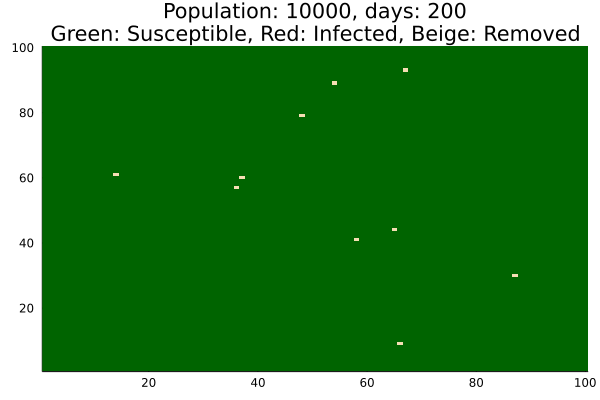

In [198]:
using Plots

anim = @animate for i in 1:days
    plot(heatmap(ca_arr, c=cgrad([:darkgreen, :maroon, :wheat]), title=string("Population: ", N, ", days: ", days, "\nGreen: Susceptible, Red: Infected, Beige: Removed"), legend=false))
    #Plots.frame(anim)
    generate_stats(ca_arr, stats_pack, dims)
    ca_arr = ca_step(ca_arr, dims, epidemic_params, movements, i)
end

gif(anim, "anim_fps10.gif", fps=10)

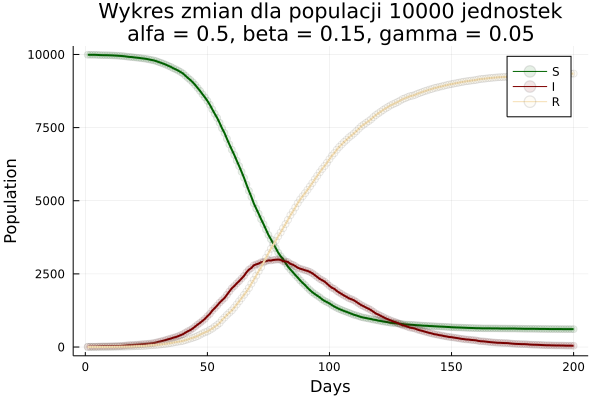

In [199]:
plot(S_stats, label="S", colour="darkgreen", lw=2, marker=0.1, xaxis="Days", yaxis="Population", title=string("Wykres zmian dla populacji ", N," jednostek\nalfa = ", alpha, ", beta = ", beta, ", gamma = ", round(gamma, digits=2)))
plot!(I_stats, label="I", colour="maroon", lw=2, marker=0.1)
plot!(R_stats, label="R", colour="wheat", lw=2, marker=0.1)

Z porównania obydwu wykresów widać, że współczynnik alfa nie ma wpływu na przebieg epidemii w modelu SIR.

### Case 1:
- $\alpha$ = 0.01
- $\beta$ = 0.
- $\gamma$ = 1/21